# 5. Frequency Domain

## Table of Contents
1. [Libraries](#libraries)
2. [Fast Fourier Transform (FFT)](#fft)
3. [Low Pass Filter](#low)
4. [High Pass Filter](#high)
5. [Homework](#homework)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

## Fast Fourier Transform (FFT) <a class="anchor" id="fft" ></a>

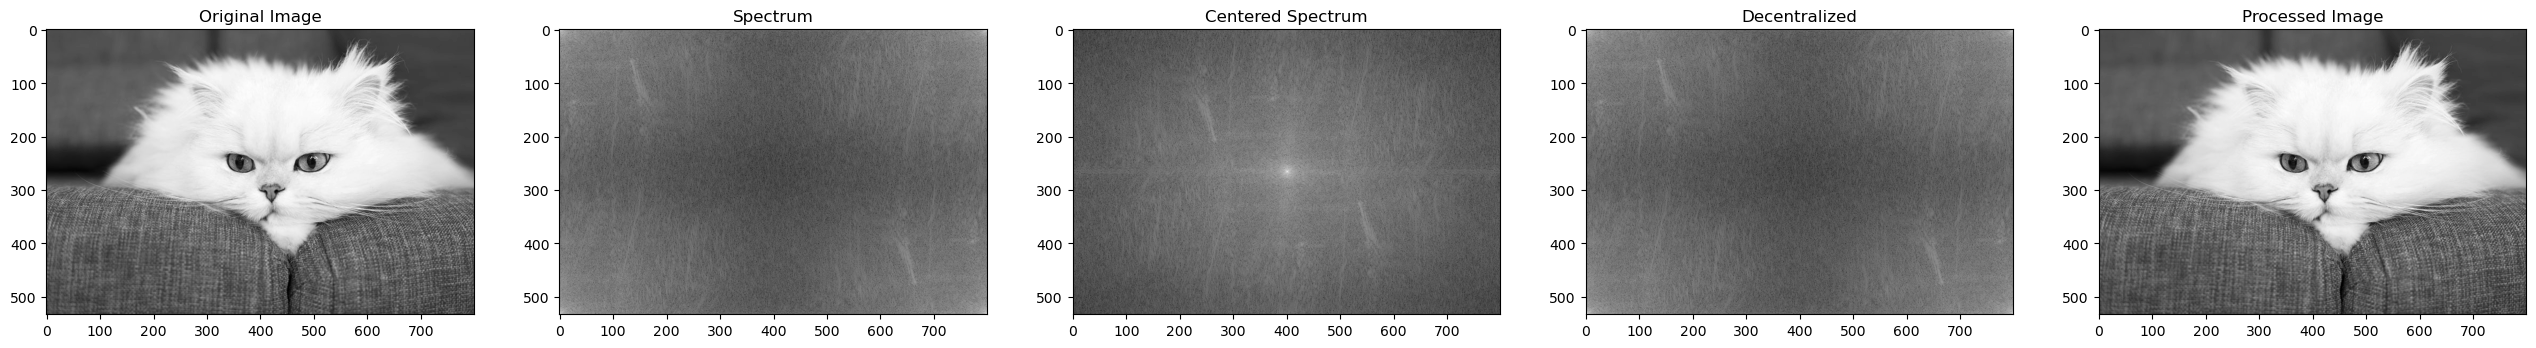

In [2]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

In [3]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)

original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")

plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

In [4]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

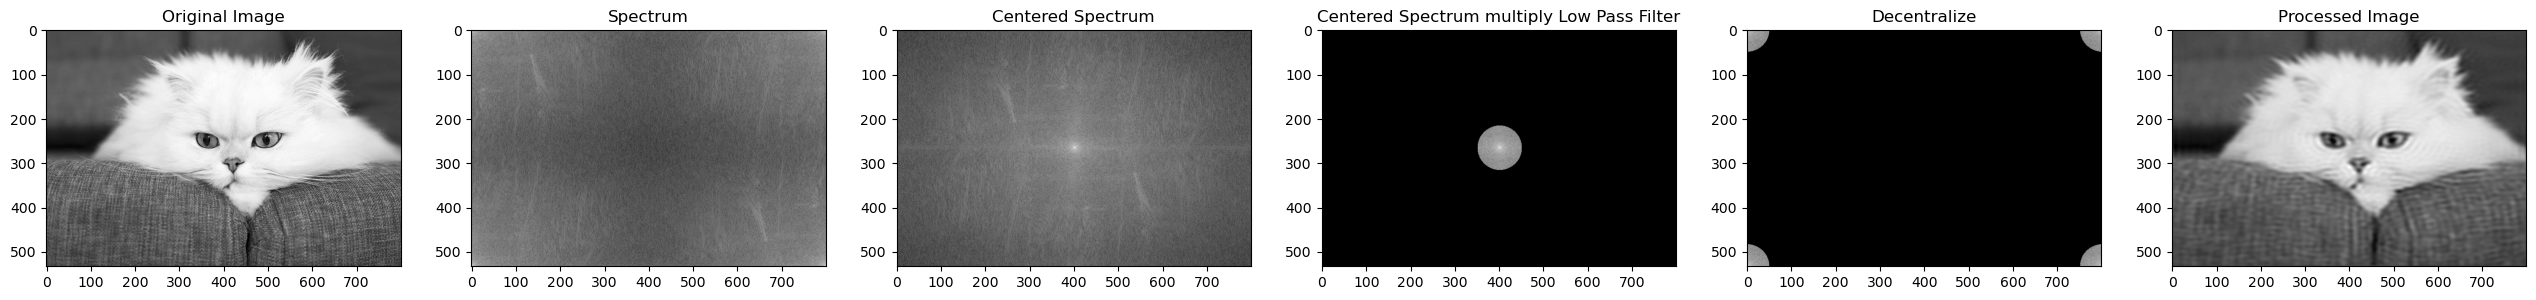

In [5]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)
plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## Low Pass Filter <a class="anchor" id="low" ></a>

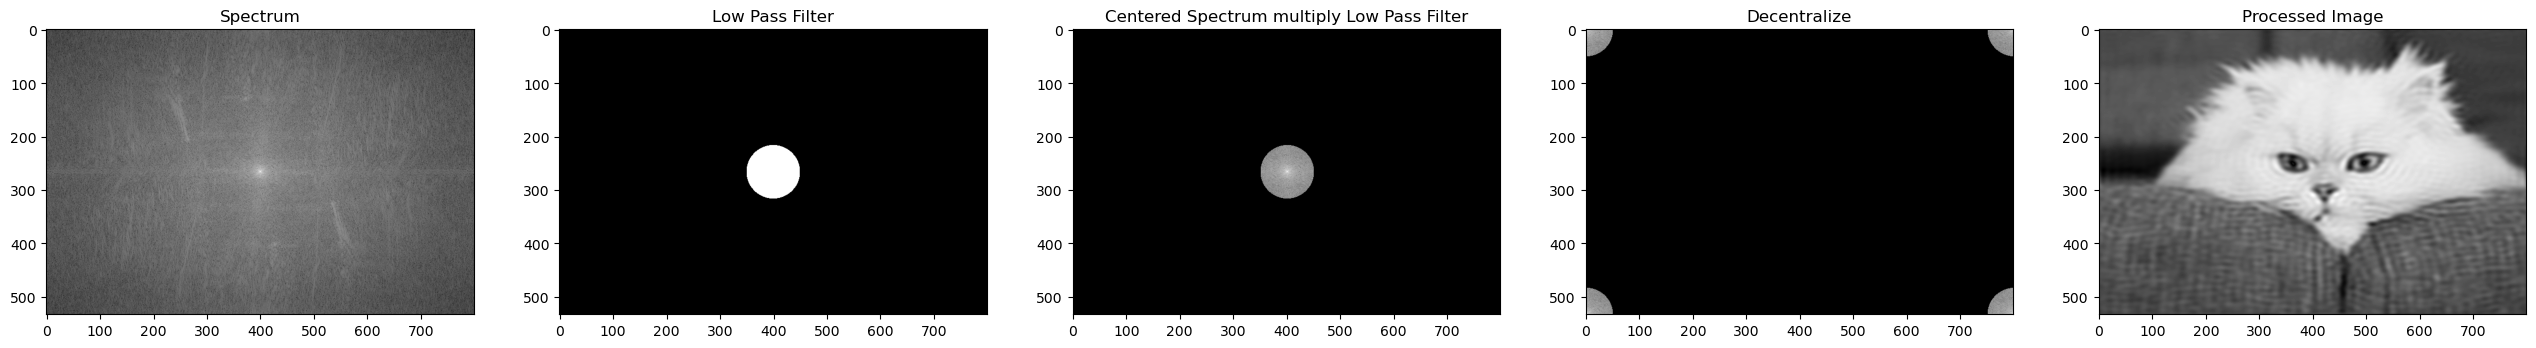

In [6]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## High Pass Filter <a class="anchor" id="high" ></a>

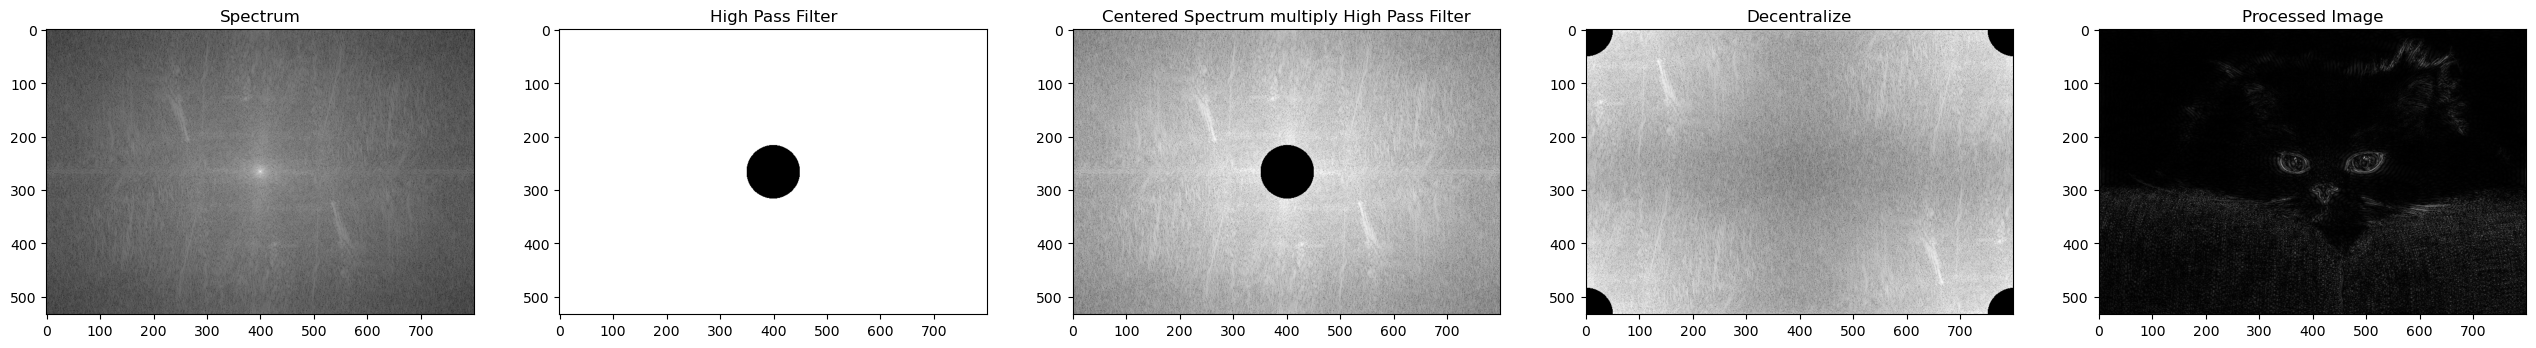

In [7]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

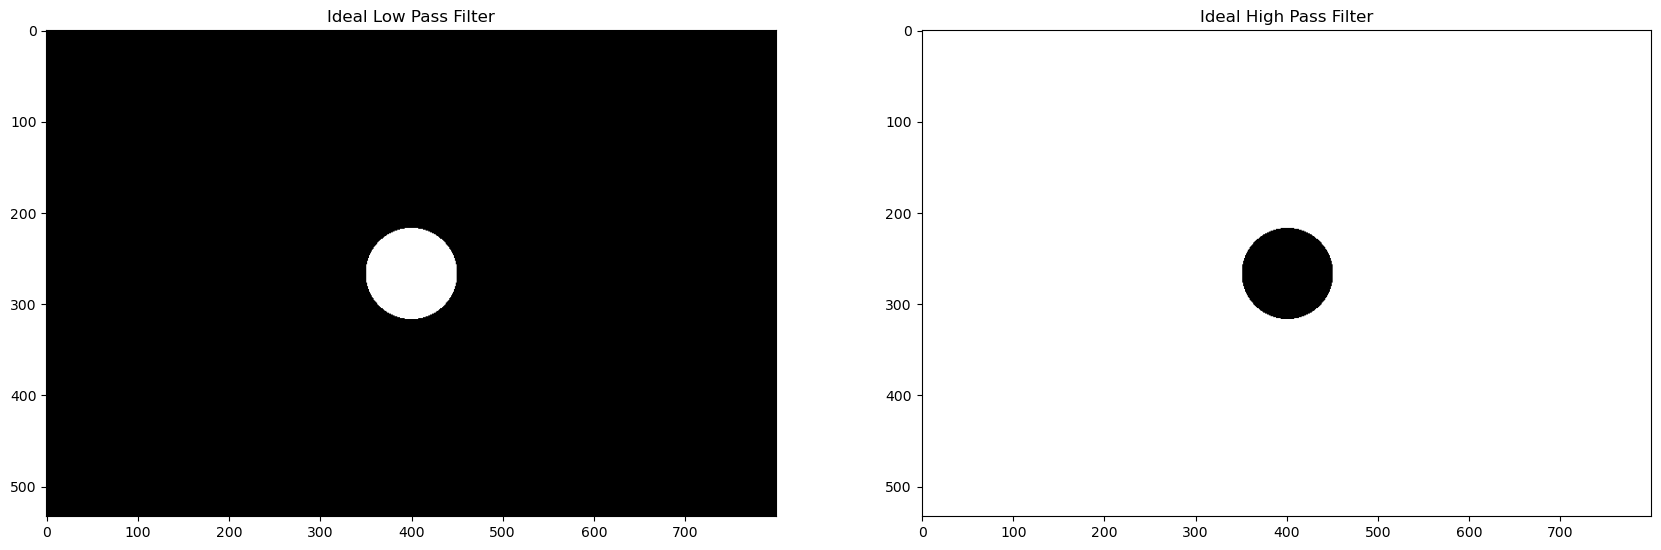

In [8]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Ideal Low Pass Filter")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Ideal High Pass Filter")

plt.show()

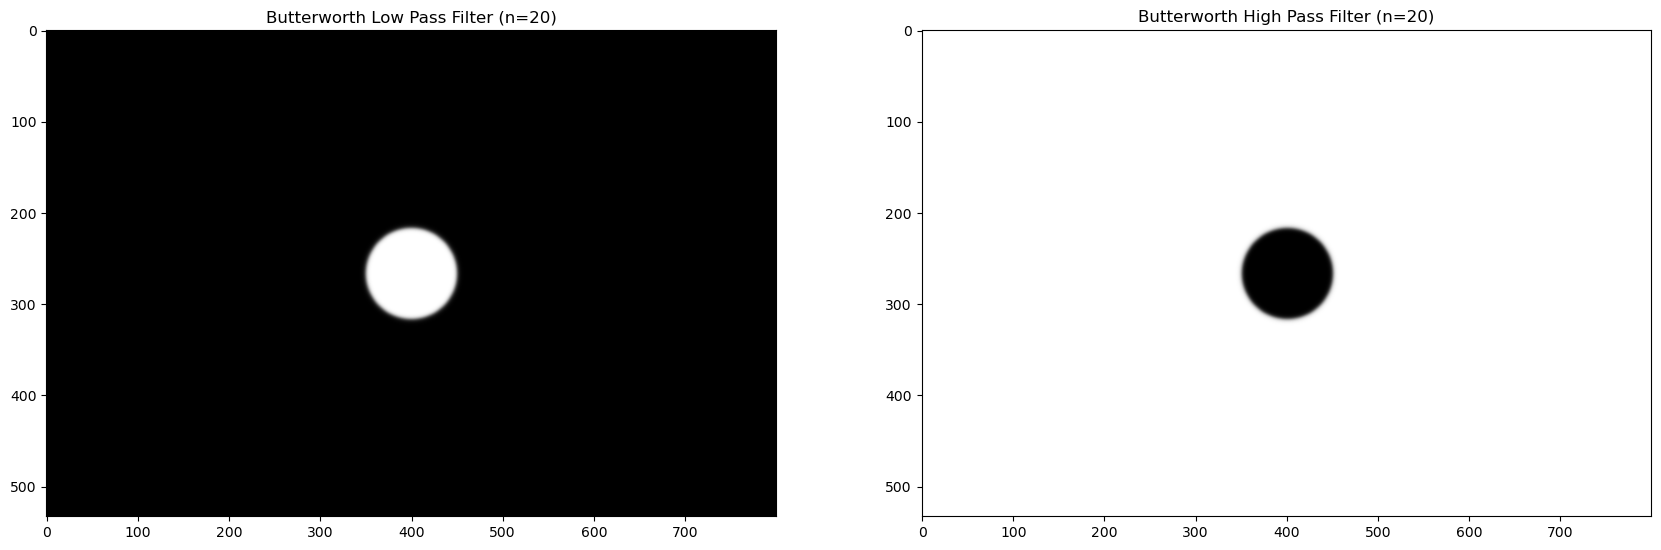

In [9]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,20)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=20)")

HighPass = butterworthHP(50,img.shape,20)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=20)")

plt.show()

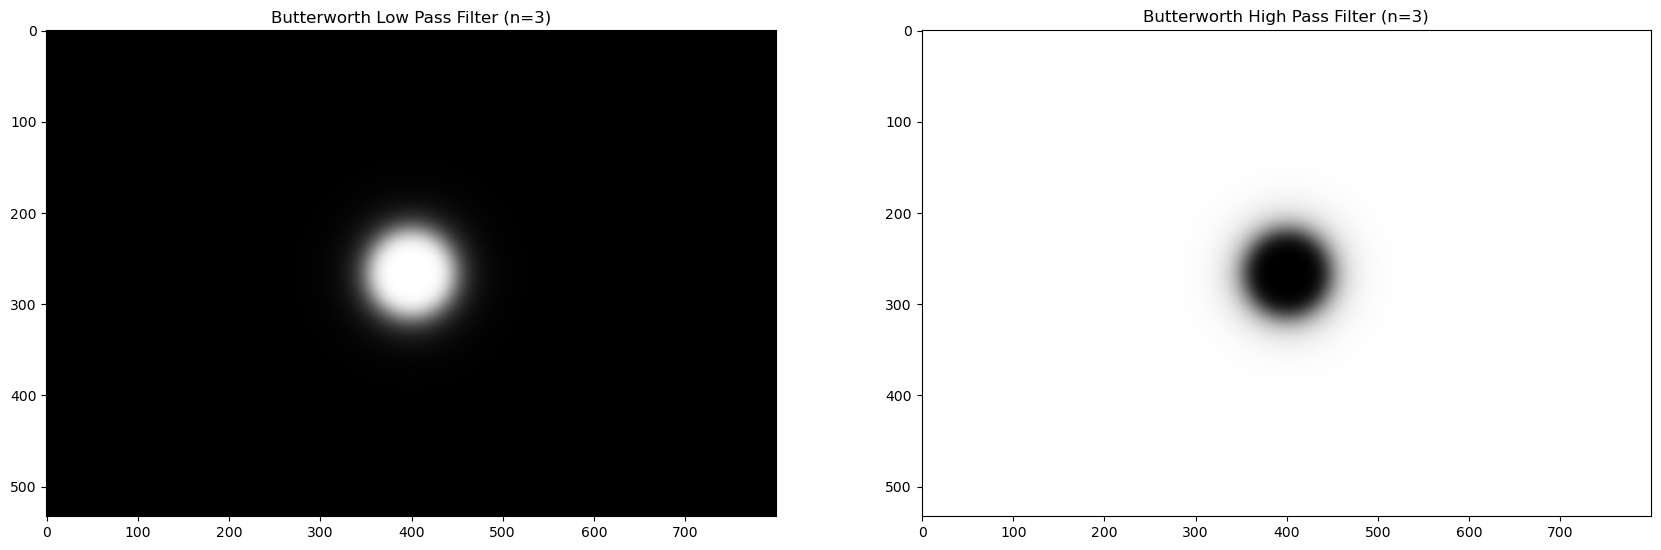

In [10]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,3)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=3)")

HighPass = butterworthHP(50,img.shape,3)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=3)")

plt.show()

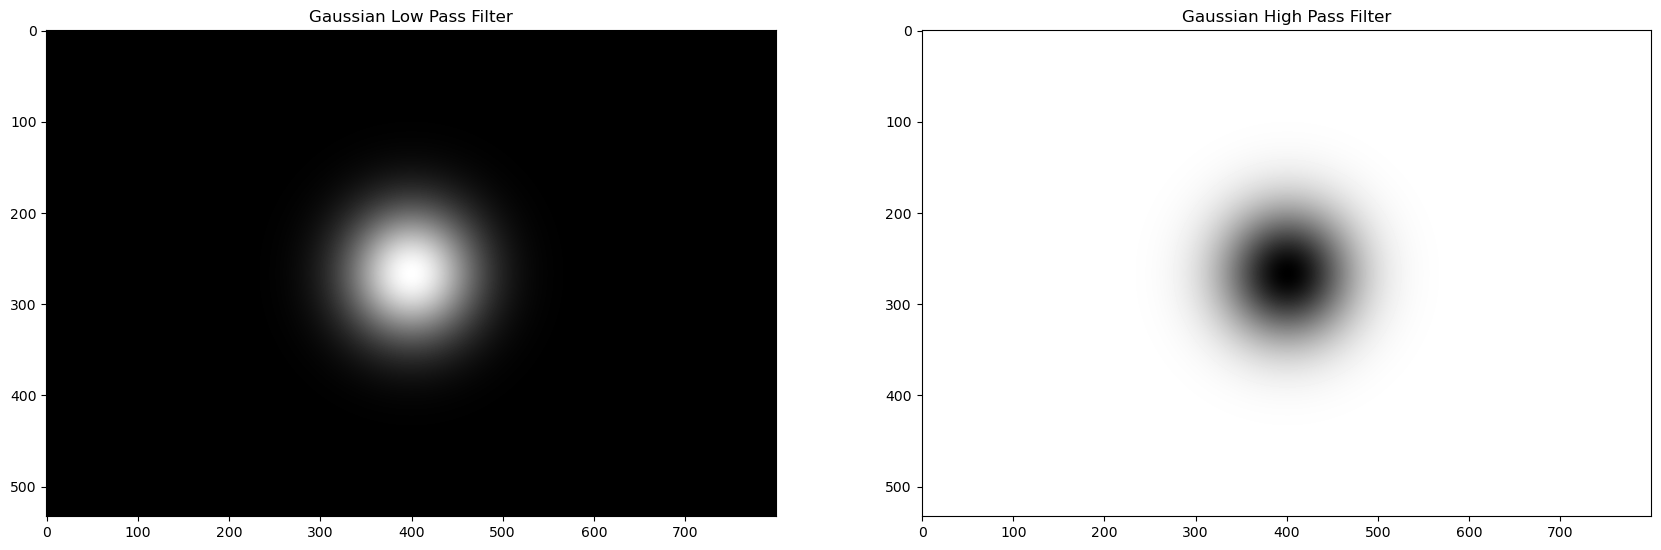

In [11]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

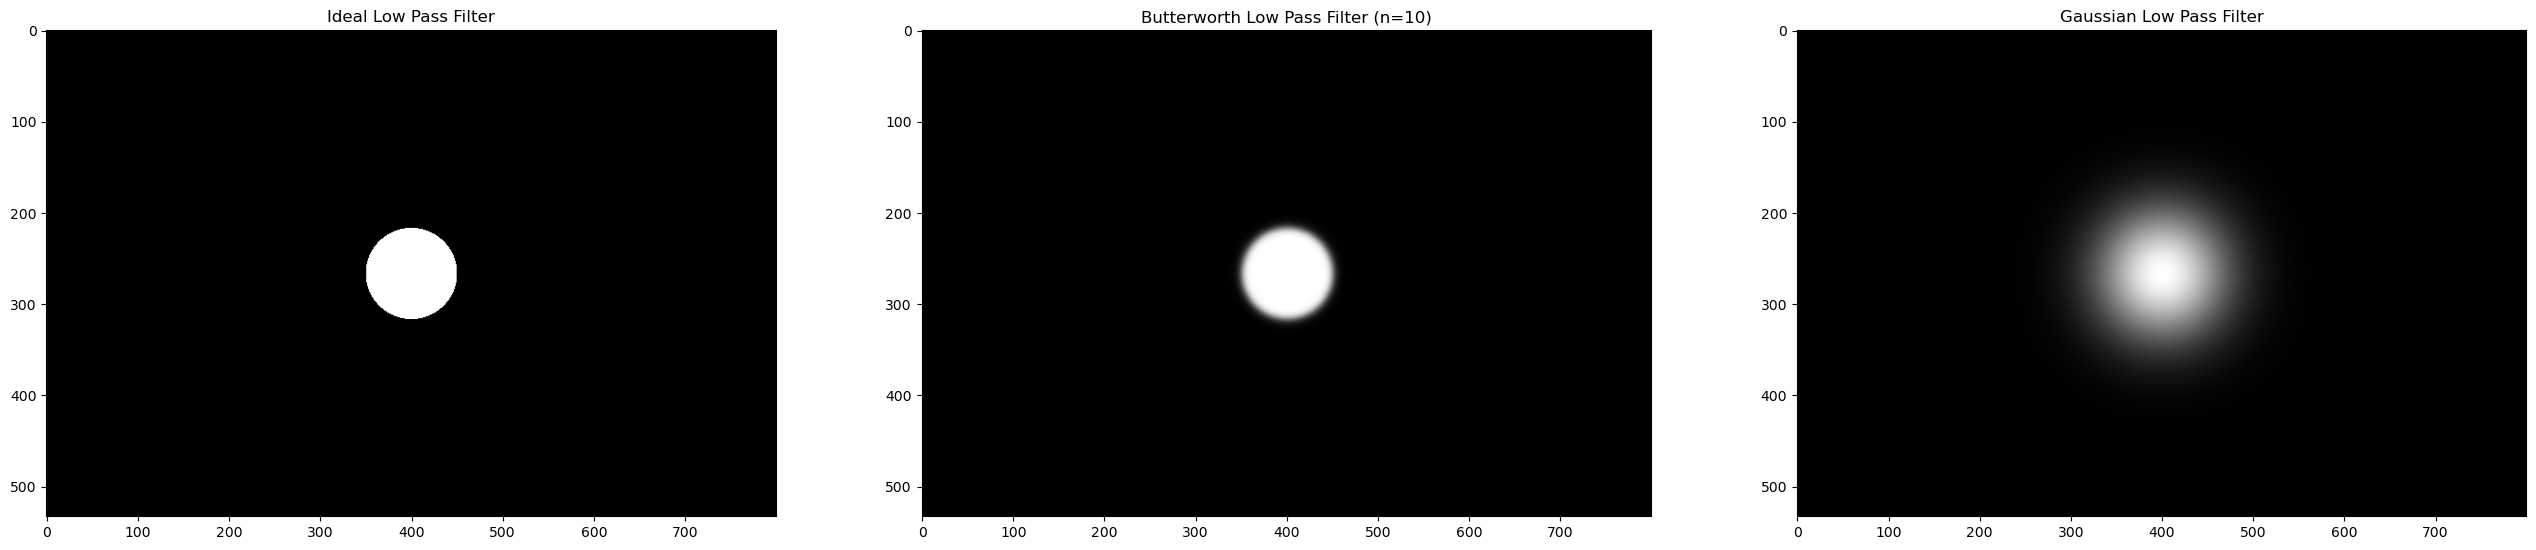

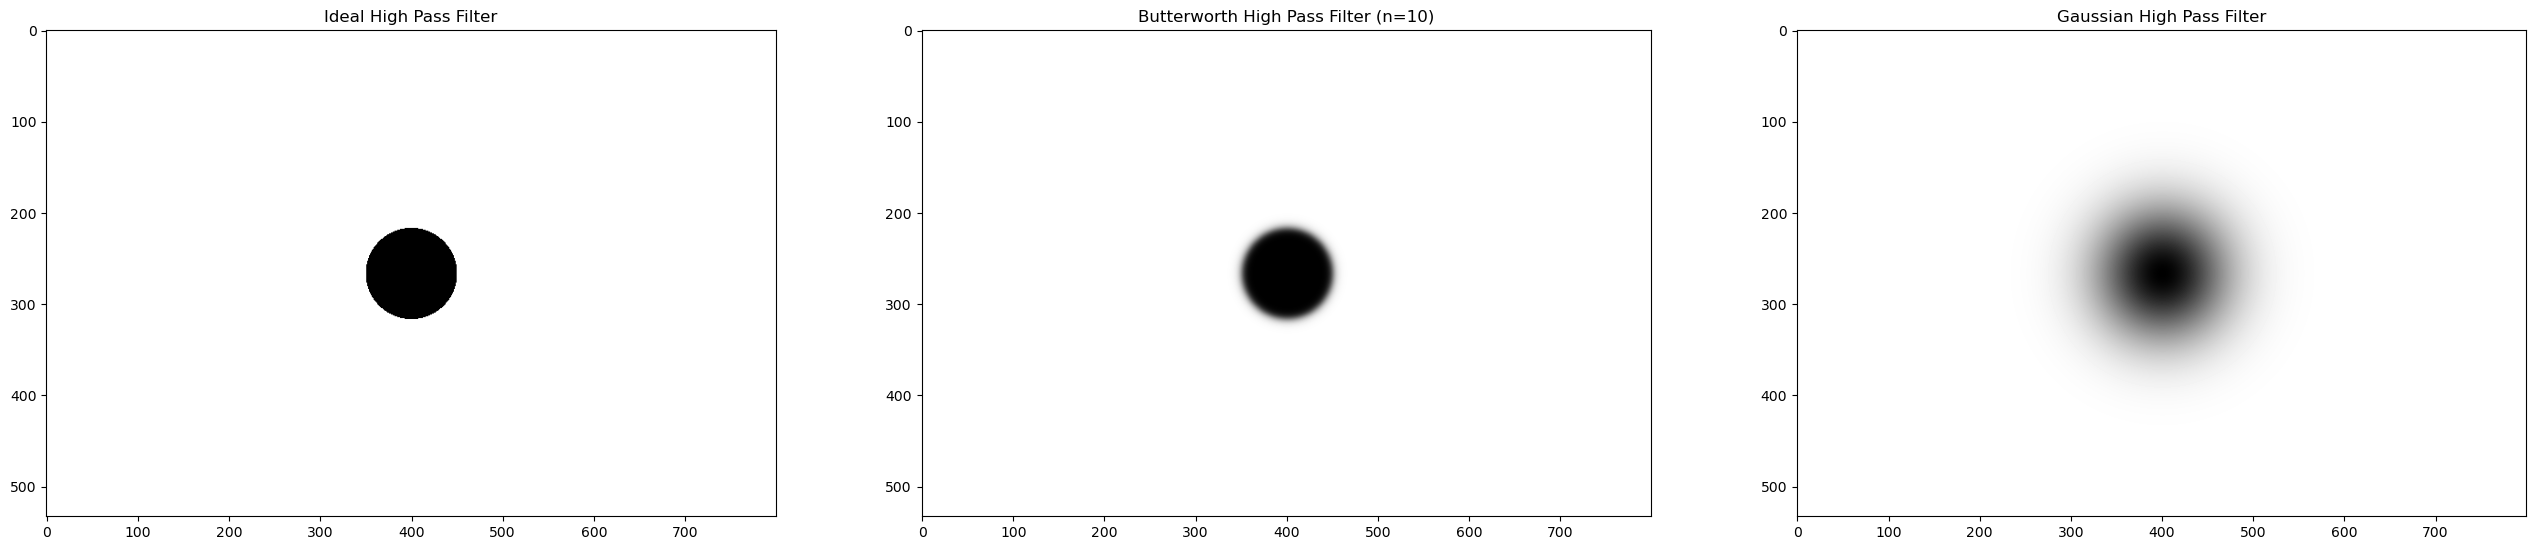

In [12]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealLP = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(IdealLP, "gray"), plt.title("Ideal Low Pass Filter")

ButterLP = butterworthLP(50,img.shape,10)
plt.subplot(132), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")

GaussianLP = gaussianLP(50,img.shape)
plt.subplot(133), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
IdealHP = idealFilterHP(50,img.shape)
plt.subplot(231), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

ButterHP = butterworthHP(50,img.shape,10)
plt.subplot(232), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

GaussianHP = gaussianHP(50,img.shape)
plt.subplot(233), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

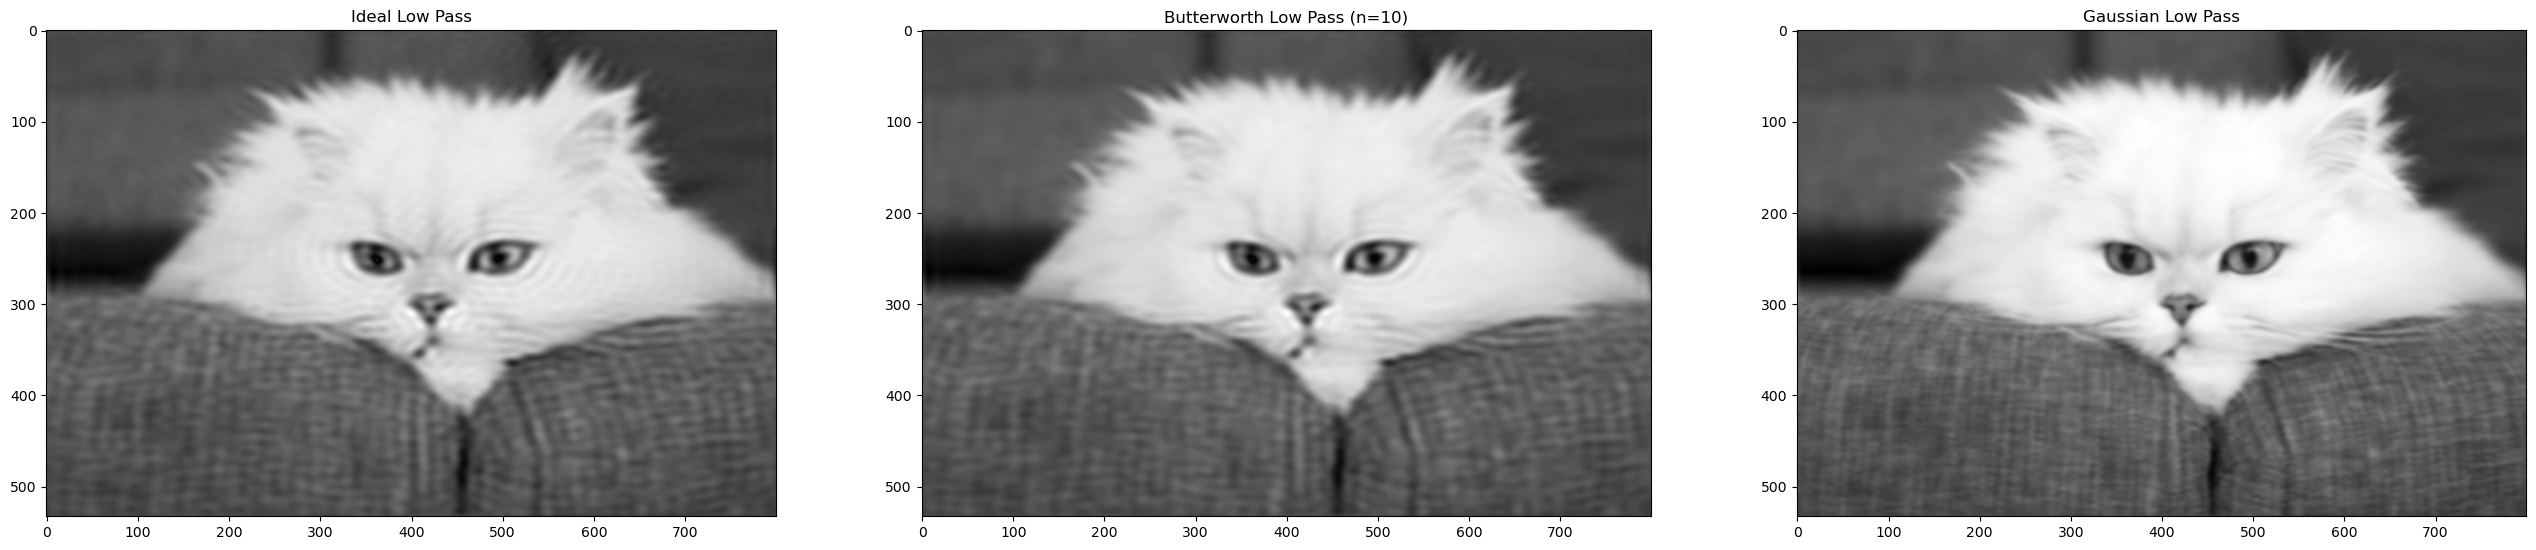

In [13]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=10)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

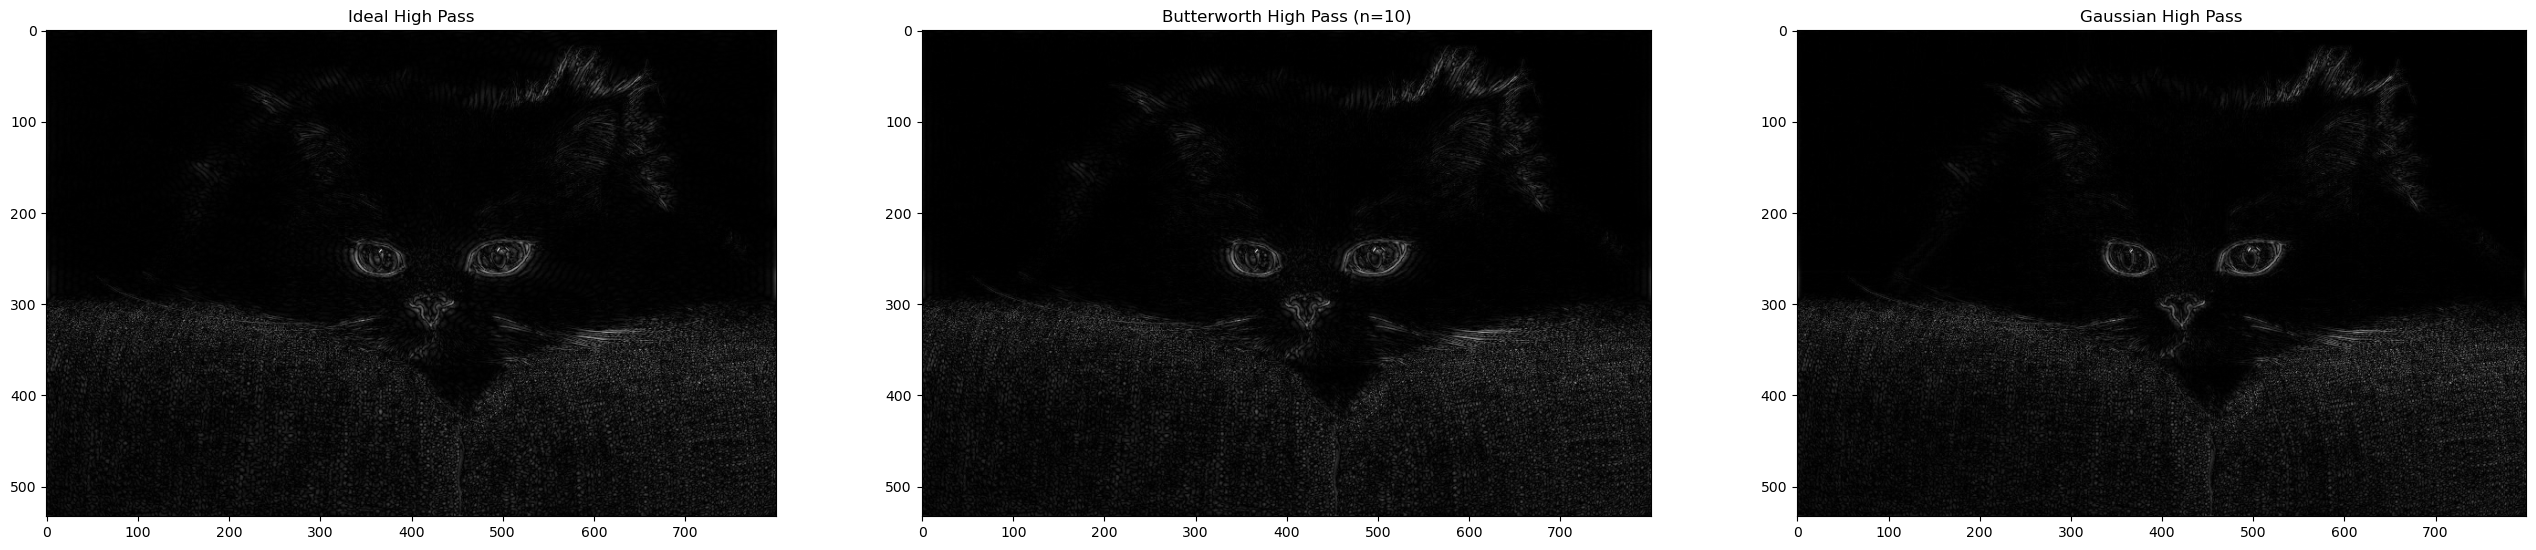

In [14]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

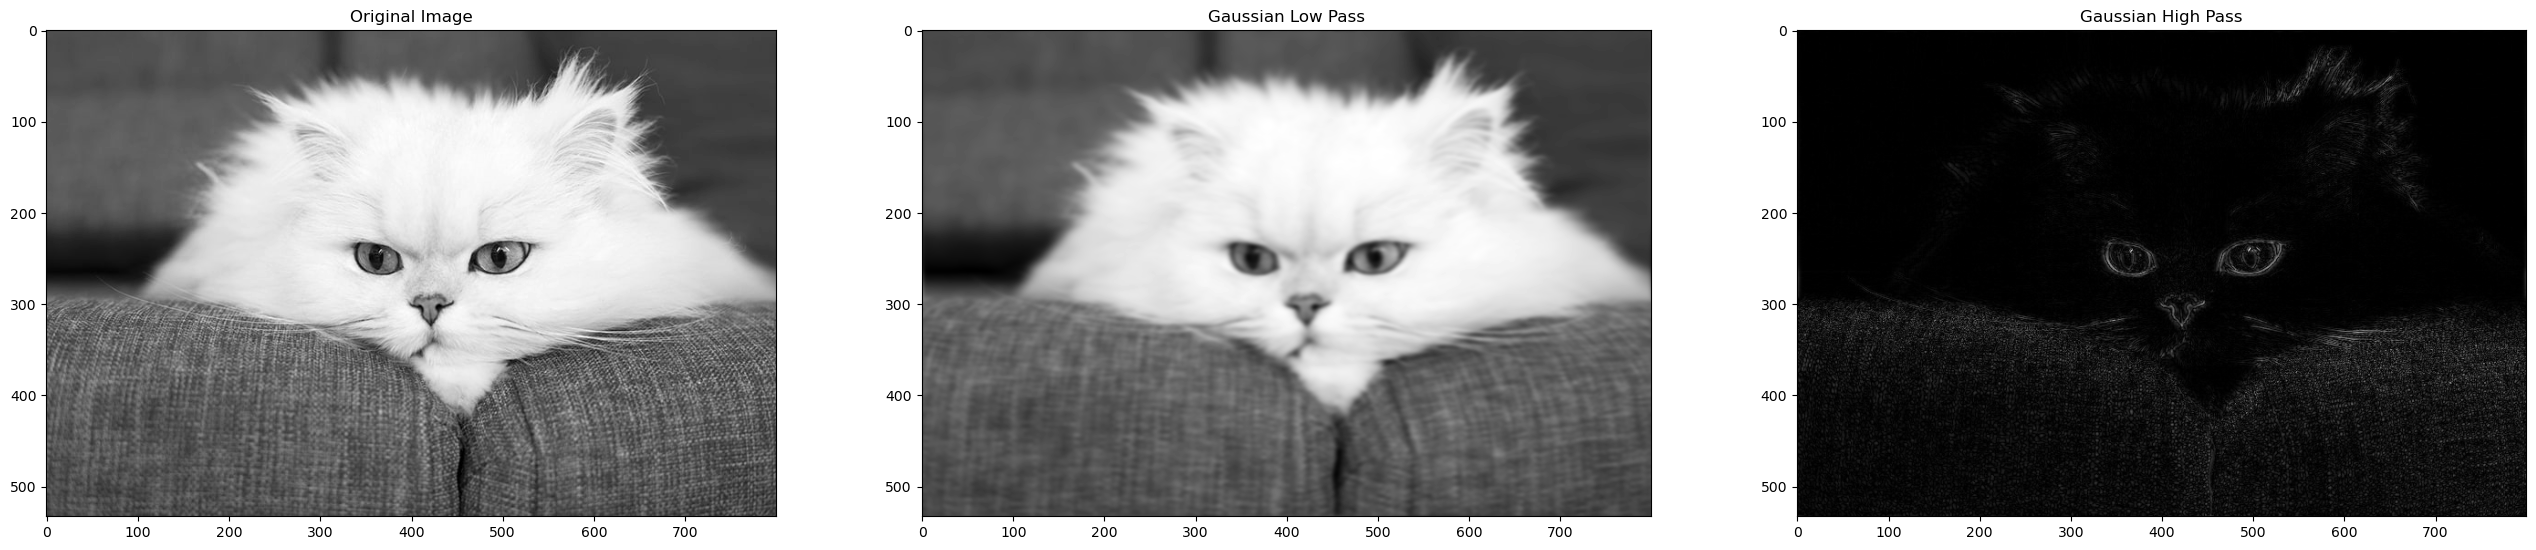

In [15]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

## Homework <a class="anchor" id="homework" ></a>

In [16]:
# Common functions.
def display_image(image, title):
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

##### a) Investigate an image enhancement application using Fourier transform using a low-pass filter. Make a simple demo. preferably try the three types of basic filters (Ideal, Butterworth and Gaussian).

Computed tomography is a diagnostic imaging technique widely used in medicine that allows detailed images of the inside of the human body to be obtained. In tomography, multiple cross-sectional images are captured using x-rays and then combined computationally to create a three-dimensional image of the anatomical structure of interest. However, CT images can be subject to artifacts and noise, which can make accurate interpretation by the doctor difficult. In this context, the application of low-pass filters using the Fourier transform offers an effective solution to improve the quality of tomography images. These filters help eliminate noise and enhance relevant details, facilitating early detection of pathologies and improving the accuracy of medical diagnosis.

In [17]:
# Constants.
IMAGE_PATH = "data/tomography.jpg"

CUTOFF_FREQUENCY = 60
BUTTERWORTH_ORDER = 2

To simulate the noise from a tomography, let's add some Gaussian noise for the filter in the demo to be more visible.

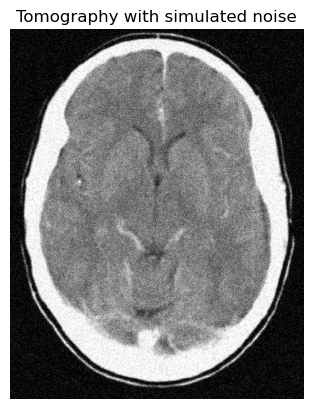

In [18]:
def add_gaussian_noise(image, mean=0, std=25):
    noisy_image = image + np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

image = add_gaussian_noise(cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE))

display_image(image, "Tomography with simulated noise")

Low pass new implementations:

In [19]:
def ideal_low_pass_filter(rows, cols):
    """
    H(u, v) = 1 if D(u, v) <= D0, 0 otherwise

    Where:
        - H(u, v) = Frequency domain of the filter.
        - D(u, v) = Distance of a point (u, v) from the center of the frequency domain.
        - D0 = Cutoff frequency.
    """
    ideal_lp_filter = np.zeros((rows, cols), np.float32)
    mid_rows, mid_cols = rows // 2, cols // 2 # Good practice to always use floor division to avoid unexpected results.
    for i in range(rows):
        for j in range(cols):
            dist = sqrt((i - mid_rows) ** 2 + (j - mid_cols) ** 2)
            if dist <= CUTOFF_FREQUENCY:
                ideal_lp_filter[i, j] = 1
    return ideal_lp_filter

def butterworth_low_pass_filter(rows, cols):
    """
    |H(u, v)|^2 = 1 / (1 + (D(u, v) / D0)^(2n))

    Where:
        - H(u, v) = Frequency domain of the filter.
        - D(u, v) = Distance of a point (u, v) from the center of the frequency domain.
        - D0 = Cutoff frequency.
        - n = Order of the filter.
    """
    butterworth_lp_filter = np.zeros((rows, cols), np.float32)
    mid_rows, mid_cols = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            dist = sqrt((i - mid_rows) ** 2 + (j - mid_cols) ** 2)
            butterworth_lp_filter[i, j] = 1 / (1 + (dist / CUTOFF_FREQUENCY) ** (2 * BUTTERWORTH_ORDER))
    return butterworth_lp_filter

def gaussian_low_pass_filter(rows, cols):
    """
    H(u, v) = 1 - e^(-D(u, v)^2 / (2 * D0^2))

    Where:
        - H(u, v) = Frequency domain of the filter.
        - D(u, v) = Distance of a point (u, v) from the center of the frequency domain.
        - D0 = Cutoff frequency.
    """
    gaussian_lp_filter = np.zeros((rows, cols), np.float32)
    mid_rows, mid_cols = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            dist = (i - mid_rows) ** 2 + (j - mid_cols) ** 2
            gaussian_lp_filter[i, j] = np.exp(-dist / (2 * (CUTOFF_FREQUENCY ** 2)))
    return gaussian_lp_filter

Let's now apply the Fourier transformation for further usage in each low pass strategy.

In [20]:
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)
rows, cols = image.shape

a.1) Ideal low pass filter:

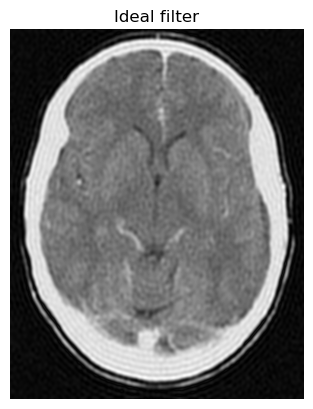

In [21]:
ideal_lp_filter = ideal_low_pass_filter(rows, cols)
filtered_f_transform_ideal = f_transform_shifted * ideal_lp_filter

filtered_image_ideal = np.fft.ifftshift(filtered_f_transform_ideal)
restored_image_ideal = np.fft.ifft2(filtered_image_ideal)
restored_image_ideal = np.abs(restored_image_ideal)

display_image(restored_image_ideal, "Ideal filter")

a.2) Butterworth low pass filter:

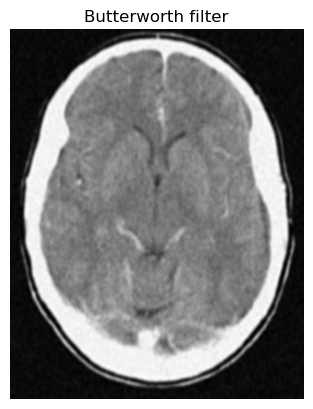

In [22]:
butterworth_lp_filter = butterworth_low_pass_filter(rows, cols)
filtered_f_transform_butterworth = f_transform_shifted * butterworth_lp_filter

filtered_image_butterworth = np.fft.ifftshift(filtered_f_transform_butterworth)
restored_image_butterworth = np.fft.ifft2(filtered_image_butterworth)
restored_image_butterworth = np.abs(restored_image_butterworth)

display_image(restored_image_butterworth, "Butterworth filter")

a.3) Gaussian low pass filter:

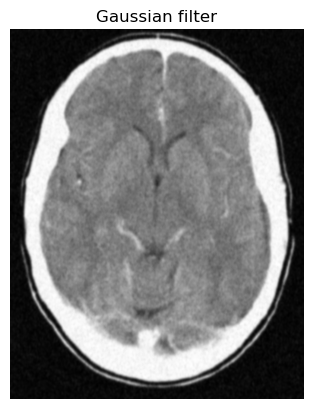

In [23]:
gaussian_lp_filter = gaussian_low_pass_filter(rows, cols)
filtered_f_transform_gaussian = f_transform_shifted * gaussian_lp_filter

filtered_image_gaussian = np.fft.ifftshift(filtered_f_transform_gaussian)
restored_image_gaussian = np.fft.ifft2(filtered_image_gaussian)
restored_image_gaussian = np.abs(restored_image_gaussian)

display_image(restored_image_gaussian, "Gaussian filter")

##### b) Investigate an image enhancement application using Fourier transform using a high pass filter. Perform a simple demo, preferably trying the three types of basic filters (Ideal, Butterworth and Gaussian).

High-Pass Filtering (HPF) is used in astrophotography to enhance details and contrast in the images of celestial bodies. In the case of the Moon, the fine details of the craters are in high frequencies, while the low frequencies hold the brightness variations in the surface of the Moon. Filtering these low frequencies enhances all the details related to the craters.

In [24]:
img = cv2.imread("data/full-moon.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(32, 24), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()